In [116]:
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'

# allowed_color = 'Green'
# polylog_color = 'Black'
# noyhat_color = 'Orange'
# giantstep_color = 'Blue'
# notallowed_color = 'Red'
# processnotdefined_color = 'Purple'
# sweetspot_color = 'cyan'

In [117]:
from giant_learning.poly_poly import SphericalH2H2Overlaps

import numpy as np

p = 1
k = 1
ds = np.array([2**5, 2**8, 2**11, 2**14, 2**17, 2**20, 2**23, 2**26, 2**29, 2**32], dtype=np.int64)
# ds = ds[::3]
T = 100
noise = 1e-6
n = 3*np.power(ds,1)
m0 = 1/np.sqrt(ds)
gamma = .1*ds**0
seed = 0

test_error = np.zeros((len(ds),T+1))

for i, d in enumerate(ds):
    Q0 = np.array([[1.]])
    P = np.array([[1.]])
    M0 = np.array([[m0[i]]])
    a0 = np.array([1.])

    print(f'd = {d}')
    print(f'P = {P}')
    print(f'M0 = {M0}')
    print(f'Q0 = {Q0}')

    ## Theoretical predictions
    equation = SphericalH2H2Overlaps(
        P, M0, Q0, a0,
        gamma[i], noise,
        I4_diagonal=float(d/n[i]), I4_offdiagonal=True,
        predictor_interaction=False
    )

    equation.train(T,verbose=True)

    test_error[i] = np.array(equation.test_errors)




d = 32
P = [[1.]]
M0 = [[0.1767767]]
Q0 = [[1.]]


100%|██████████| 100/100 [00:00<00:00, 19094.53it/s]


d = 256
P = [[1.]]
M0 = [[0.0625]]
Q0 = [[1.]]


100%|██████████| 100/100 [00:00<00:00, 20851.62it/s]


d = 2048
P = [[1.]]
M0 = [[0.02209709]]
Q0 = [[1.]]


100%|██████████| 100/100 [00:00<00:00, 22370.81it/s]


d = 16384
P = [[1.]]
M0 = [[0.0078125]]
Q0 = [[1.]]


100%|██████████| 100/100 [00:00<00:00, 24943.82it/s]


d = 131072
P = [[1.]]
M0 = [[0.00276214]]
Q0 = [[1.]]


100%|██████████| 100/100 [00:00<00:00, 25366.22it/s]


d = 1048576
P = [[1.]]
M0 = [[0.00097656]]
Q0 = [[1.]]


100%|██████████| 100/100 [00:00<00:00, 24026.49it/s]


d = 8388608
P = [[1.]]
M0 = [[0.00034527]]
Q0 = [[1.]]


100%|██████████| 100/100 [00:00<00:00, 24611.57it/s]


d = 67108864
P = [[1.]]
M0 = [[0.00012207]]
Q0 = [[1.]]


100%|██████████| 100/100 [00:00<00:00, 24067.85it/s]


d = 536870912
P = [[1.]]
M0 = [[4.31583729e-05]]
Q0 = [[1.]]


100%|██████████| 100/100 [00:00<00:00, 24587.04it/s]


d = 4294967296
P = [[1.]]
M0 = [[1.52587891e-05]]
Q0 = [[1.]]


100%|██████████| 100/100 [00:00<00:00, 24827.18it/s]


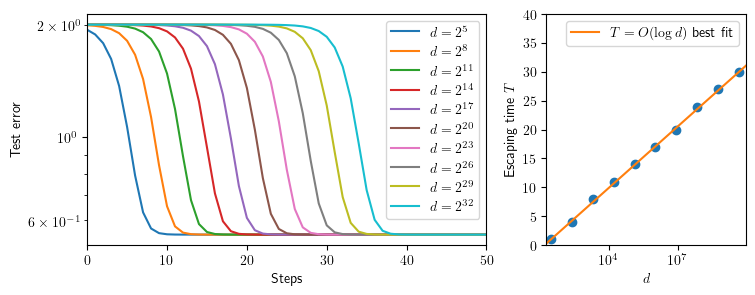

In [118]:

fig, ax = plt.subplots(1,2,figsize=(8.5,3), width_ratios=[2.4,1.2])
# ax[0].set_xscale('log')
ax[0].set_yscale('log',base=10)
ax[0].set_xlabel(r'Steps')
ax[0].set_ylabel(r'Test error')
ax[0].set_xlim([0,50])

for i, d in enumerate(ds):
    ax[0].plot(np.arange(T+1),test_error[i,:],label=f'$d=2^{{{5+3*i}}}$')

ax[0].legend()

ax[1].set_xlabel(r'$d$')
ax[1].set_ylabel(r'Escaping time $T$')

t_escape = np.argmax(test_error < 1.9, axis=1)
ax[1].plot(ds,t_escape,'o')
ax[1].set_xscale('log')

# fit t_escape = C log(d) + b
C = (t_escape[-1]-t_escape[0])/np.log(ds[-1]/ds[0])
b = t_escape[0] - C*np.log(ds[0])

ls = np.logspace(0,33,100)
ax[1].plot(ls,C*np.log(ls)+b,label=r'$T = O(\log d)$ best fit')
ax[1].set_xlim([20,2**33])
ax[1].set_ylim([0,40])


ax[1].legend()

fig.savefig('figures/polylog_region.pdf',bbox_inches='tight')